In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import importlib

from collections import defaultdict
from collections import Counter

from scipy.stats import norm

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [ ]:
df = pd.read_csv(r'C:/Users/ricky/Desktop/Scrivania/Data Mining/DM_2/dataframe_dimensionality_reduction.csv',  header=0, parse_dates=True, squeeze=True)


In [ ]:
df= df.drop(['Unnamed: 0'], axis=1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hours,Office_Hours,Working_day,Time_blocks_0,...,Temperature/HumidityRatio,Humidity/CO2,Humidity/Temperature,Humidity/HumidityRatio,HumidityRatio/Humidity,HumidityRatio/Temperature,HumidityRatio/CO2,CO2/Temperature,CO2/Humidity,CO2/HumidityRatio
0,23.7000,26.272,585.200000,749.200000,0.004764,1,14,1,1,0,...,4974.640851,0.035067,1.108523,5514.504828,0.000181,0.000201,0.000006,31.611814,28.517052,157257.423014
1,23.7180,26.290,578.400000,760.400000,0.004773,1,14,1,1,0,...,4969.554728,0.034574,1.108441,5508.457450,0.000182,0.000201,0.000006,32.060039,28.923545,159324.117354
2,23.7300,26.230,572.666667,769.666667,0.004765,1,14,1,1,0,...,4979.903526,0.034080,1.105352,5504.545702,0.000182,0.000201,0.000006,32.434331,29.342991,161519.837653
3,23.7225,26.125,493.750000,774.750000,0.004744,1,14,1,1,0,...,5000.765892,0.033721,1.101275,5507.219262,0.000182,0.000200,0.000006,32.658868,29.655502,163319.353995
4,23.7540,26.200,488.600000,779.000000,0.004767,1,14,1,1,0,...,4983.432615,0.033633,1.102972,5496.587291,0.000182,0.000201,0.000006,32.794477,29.732824,163429.064863


In [ ]:
df.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy',
       'Hours', 'Office_Hours', 'Working_day', 'Time_blocks_0',
       'Time_blocks_1', 'Time_blocks_2', 'Time_blocks_3', 'Light/Temperature',
       'Light/Humidity', 'Light/CO2', 'Light/HumidityRatio', 'Temperature/CO2',
       'Temperature/Humidity', 'Temperature/HumidityRatio', 'Humidity/CO2',
       'Humidity/Temperature', 'Humidity/HumidityRatio',
       'HumidityRatio/Humidity', 'HumidityRatio/Temperature',
       'HumidityRatio/CO2', 'CO2/Temperature', 'CO2/Humidity',
       'CO2/HumidityRatio'],
      dtype='object')

In [ ]:
class_name = 'Occupancy'
#columns2remove = []
#df.drop(columns2remove, inplace=True, axis=1)
#df.head()

In [ ]:
from data_preparation import prepare_dataset

In [ ]:
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Hours,Office_Hours,Working_day,Time_blocks_0,Time_blocks_1,...,Humidity/CO2,Humidity/Temperature,Humidity/HumidityRatio,HumidityRatio/Humidity,HumidityRatio/Temperature,HumidityRatio/CO2,CO2/Temperature,CO2/Humidity,CO2/HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,14,1,1,0,0,...,0.035067,1.108523,5514.504828,0.000181,0.000201,0.000006,31.611814,28.517052,157257.423014,1
1,23.7180,26.290,578.400000,760.400000,0.004773,14,1,1,0,0,...,0.034574,1.108441,5508.457450,0.000182,0.000201,0.000006,32.060039,28.923545,159324.117354,1
2,23.7300,26.230,572.666667,769.666667,0.004765,14,1,1,0,0,...,0.034080,1.105352,5504.545702,0.000182,0.000201,0.000006,32.434331,29.342991,161519.837653,1
3,23.7225,26.125,493.750000,774.750000,0.004744,14,1,1,0,0,...,0.033721,1.101275,5507.219262,0.000182,0.000200,0.000006,32.658868,29.655502,163319.353995,1
4,23.7540,26.200,488.600000,779.000000,0.004767,14,1,1,0,0,...,0.033633,1.102972,5496.587291,0.000182,0.000201,0.000006,32.794477,29.732824,163429.064863,1


In [ ]:
#Normalizzazione
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)

In [ ]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [ ]:
X_train.shape, X_test.shape

((14392, 28), (6168, 28))

**Decision Tree**

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy 0.9907587548638133
F1-score [0.99398924 0.98002103]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4743
           1       0.98      0.98      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

Accuracy: 0.9273 (+/- 0.13)
F1-score: 0.8946 (+/- 0.19)
0.9873637604447552


**K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Accuracy 0.9892996108949417
F1-score [0.9930203  0.97708333]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.97      0.99      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

Accuracy: 0.9584 (+/- 0.07)
F1-score: 0.9441 (+/- 0.09)
0.988624121974766


**Logistic Regression**

In [ ]:
#from sklearn.linear_model import LogisticRegression

In [ ]:
#clf = LogisticRegression()
#clf.fit(X_train, y_train)

#y_pred = clf.predict(X_test)

#print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
#print(classification_report(y_test, y_pred))

#scores = cross_val_score(clf, X, y, cv=10)
#print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
#print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#ROC
#fpr, tpr, _ = roc_curve(y_test, y_pred)
#roc_auc = auc(fpr, tpr)
#print(roc_auc)

#roc_auc = roc_auc_score(y_test, y_pred, average=None)

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy 0.9667639429312581
F1-score [0.97792613 0.93276484]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4743
           1       0.88      1.00      0.93      1425

    accuracy                           0.97      6168
   macro avg       0.94      0.98      0.96      6168
weighted avg       0.97      0.97      0.97      6168

Accuracy: 0.9313 (+/- 0.20)
F1-score: 0.9208 (+/- 0.21)
0.9776528290999478


In [ ]:
import sys
sys.path.append('./')

**DIMENSIONALITY REDUCTION**

**Variance Threshold**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
sel = VarianceThreshold(threshold=(.5 * (1 - .5)))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(14392, 13)

In [ ]:
X_test_sel = sel.transform(X_test)

clf_1 = DecisionTreeClassifier()
clf_1.fit(X_train_sel, y_train)

y_pred_1 = clf_1.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred_1))
print('F1-score %s' % f1_score(y_test, y_pred_1, average=None))
print(classification_report(y_test, y_pred_1))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_1)
roc_auc_1 = auc(fpr, tpr)
print(roc_auc_1)

roc_auc_1 = roc_auc_score(y_test, y_pred_1, average=None)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy 0.9901102464332037
F1-score [0.99357015 0.97858898]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4743
           1       0.98      0.98      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

0.9859602516728253


In [ ]:
X_test_sel = sel.transform(X_test)

clf_1 = KNeighborsClassifier()
clf_1.fit(X_train_sel, y_train)

y_pred_1 = clf_1.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred_1))
print('F1-score %s' % f1_score(y_test, y_pred_1, average=None))
print(classification_report(y_test, y_pred_1))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_1)
roc_auc_1 = auc(fpr, tpr)
print(roc_auc_1)

roc_auc_1 = roc_auc_score(y_test, y_pred_1, average=None)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Accuracy 0.9892996108949417
F1-score [0.9930203  0.97708333]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.97      0.99      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

0.988624121974766


In [ ]:
X_test_sel = sel.transform(X_test)

clf_1 = GaussianNB()
clf_1.fit(X_train_sel, y_train)

y_pred_1 = clf_1.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred_1))
print('F1-score %s' % f1_score(y_test, y_pred_1, average=None))
print(classification_report(y_test, y_pred_1))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_1)
roc_auc_1 = auc(fpr, tpr)
print(roc_auc_1)

roc_auc_1 = roc_auc_score(y_test, y_pred_1, average=None)

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy 0.9675745784695201
F1-score [0.97847611 0.93429698]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4743
           1       0.88      1.00      0.93      1425

    accuracy                           0.97      6168
   macro avg       0.94      0.98      0.96      6168
weighted avg       0.97      0.97      0.97      6168

0.9781799216574009


**Univariate Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
sel = SelectKBest(k=8)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(14392, 8)

In [ ]:
X_test_sel = sel.transform(X_test)

clf_2 = DecisionTreeClassifier()
clf_2.fit(X_train_sel, y_train)

y_pred_2 = clf_2.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred_2))
print('F1-score %s' % f1_score(y_test, y_pred_2, average=None))
print(classification_report(y_test, y_pred_2))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_2)
roc_auc_2 = auc(fpr, tpr)
print(roc_auc_2)

roc_auc_2 = roc_auc_score(y_test, y_pred_2, average=None)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy 0.9896238651102465
F1-score [0.99325322 0.97754386]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4743
           1       0.98      0.98      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

0.9853985374568617


In [ ]:
X_test_sel = sel.transform(X_test)

clf_2 = KNeighborsClassifier()
clf_2.fit(X_train_sel, y_train)

y_pred_2 = clf_2.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred_2))
print('F1-score %s' % f1_score(y_test, y_pred_2, average=None))
print(classification_report(y_test, y_pred_2))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_2)
roc_auc_2 = auc(fpr, tpr)
print(roc_auc_2)

roc_auc_2 = roc_auc_score(y_test, y_pred_2, average=None)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Accuracy 0.976491569390402
F1-score [0.98454981 0.95086411]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4743
           1       0.92      0.98      0.95      1425

    accuracy                           0.98      6168
   macro avg       0.96      0.98      0.97      6168
weighted avg       0.98      0.98      0.98      6168

0.9793142248410401


In [ ]:
X_test_sel = sel.transform(X_test)

clf_2 = GaussianNB()
clf_2.fit(X_train_sel, y_train)

y_pred_2 = clf_2.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred_2))
print('F1-score %s' % f1_score(y_test, y_pred_2, average=None))
print(classification_report(y_test, y_pred_2))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_2)
roc_auc_2 = auc(fpr, tpr)
print(roc_auc_2)

roc_auc_2 = roc_auc_score(y_test, y_pred_2, average=None)

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy 0.9625486381322957
F1-score [0.97505669 0.92487805]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      4743
           1       0.86      1.00      0.92      1425

    accuracy                           0.96      6168
   macro avg       0.93      0.97      0.95      6168
weighted avg       0.97      0.96      0.96      6168

0.9749119478011916


**Recursive Features Elimination**

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sel = SelectFromModel(DecisionTreeClassifier())
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(14392, 1)

In [ ]:
X_test_sel = sel.transform(X_test)

clf_3 = DecisionTreeClassifier()
clf_3.fit(X_train_sel, y_train)

y_pred_3 = clf_3.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred_3))
print('F1-score %s' % f1_score(y_test, y_pred_3, average=None)) #la performance questa volta non è male
print(classification_report(y_test, y_pred_3))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_3)
roc_auc_3 = auc(fpr, tpr)
print(roc_auc_3)

roc_auc_3 = roc_auc_score(y_test, y_pred_3, average=None)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy 0.982166018158236
F1-score [0.98839907 0.9614576 ]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4743
           1       0.96      0.96      0.96      1425

    accuracy                           0.98      6168
   macro avg       0.97      0.98      0.97      6168
weighted avg       0.98      0.98      0.98      6168

0.9753946536169646


In [ ]:
X_test_sel = sel.transform(X_test)

clf_3 = KNeighborsClassifier()
clf_3.fit(X_train_sel, y_train)

y_pred_3 = clf_3.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred_3))
print('F1-score %s' % f1_score(y_test, y_pred_3, average=None)) #la performance questa volta non è male
print(classification_report(y_test, y_pred_3))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_3)
roc_auc_3 = auc(fpr, tpr)
print(roc_auc_3)

roc_auc_3 = roc_auc_score(y_test, y_pred_3, average=None)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Accuracy 0.9881647211413749
F1-score [0.99227104 0.97474922]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.96      0.99      0.97      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168

0.9883771097573155


In [ ]:
X_test_sel = sel.transform(X_test)

clf_3 = GaussianNB()
clf_3.fit(X_train_sel, y_train)

y_pred_3 = clf_3.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred_3))
print('F1-score %s' % f1_score(y_test, y_pred_3, average=None)) #la performance questa volta non è male
print(classification_report(y_test, y_pred_3))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_3)
roc_auc_3 = auc(fpr, tpr)
print(roc_auc_3)

roc_auc_3 = roc_auc_score(y_test, y_pred_3, average=None)

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy 0.9760051880674449
F1-score [0.98416096 0.95053476]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4743
           1       0.91      1.00      0.95      1425

    accuracy                           0.98      6168
   macro avg       0.95      0.98      0.97      6168
weighted avg       0.98      0.98      0.98      6168

0.9836616842549131


# Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=5)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_train_pca.shape

(14392, 20)

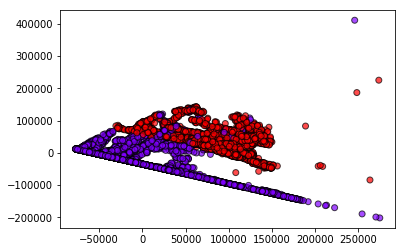

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.rainbow, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(criterion='entropy',
                               max_depth=5, min_samples_split=100, min_samples_leaf=100, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Accuracy 0.9734111543450065
F1-score [0.98241852 0.94547872]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4743
           1       0.90      1.00      0.95      1425

   micro avg       0.97      0.97      0.97      6168
   macro avg       0.95      0.98      0.96      6168
weighted avg       0.98      0.97      0.97      6168



In [ ]:
X_test_pca = pca.transform(X_test)

clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Accuracy 0.9463359273670557
F1-score [0.96385279 0.89587921]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      4743
           1       0.81      1.00      0.90      1425

   micro avg       0.95      0.95      0.95      6168
   macro avg       0.91      0.96      0.93      6168
weighted avg       0.96      0.95      0.95      6168



In [ ]:
X_test_pca = pca.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=19, weights='uniform')
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')

Accuracy 0.9847600518806745
F1-score [0.99002758 0.96769759]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4743
           1       0.95      0.99      0.97      1425

   micro avg       0.98      0.98      0.98      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.99      0.98      0.98      6168



In [ ]:
X_test_pca = pca.transform(X_test)

clf = GaussianNB()
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy 0.9640077821011673
F1-score [0.97639804 0.92423208]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4743
           1       0.90      0.95      0.92      1425

   micro avg       0.96      0.96      0.96      6168
   macro avg       0.94      0.96      0.95      6168
weighted avg       0.97      0.96      0.96      6168



Text(0.5, 1.0, 'PCA')

Text(0, 0.5, 'Fraction of Variance')

([<matplotlib.axis.XTick at 0x1da25646390>,
 <a list of 5 Text xticklabel objects>)

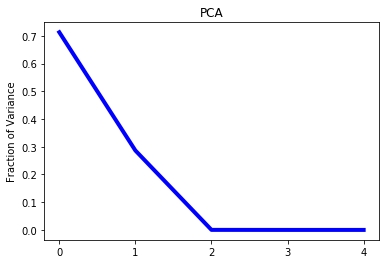

In [ ]:
plt.plot(PCA(n_components=5).fit(X_train_pca).explained_variance_ratio_, lw=4, color='b', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.xticks(range(5))
plt.show()